In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
####keeping the copy of original datasets###
train_ori = train.copy()
test_ori  = test.copy()

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.shape,test.shape

((614, 13), (367, 12))

In [7]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

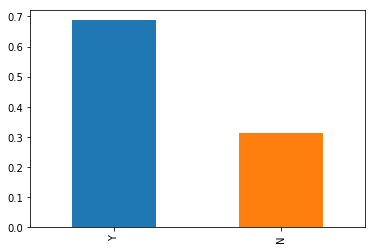

In [8]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

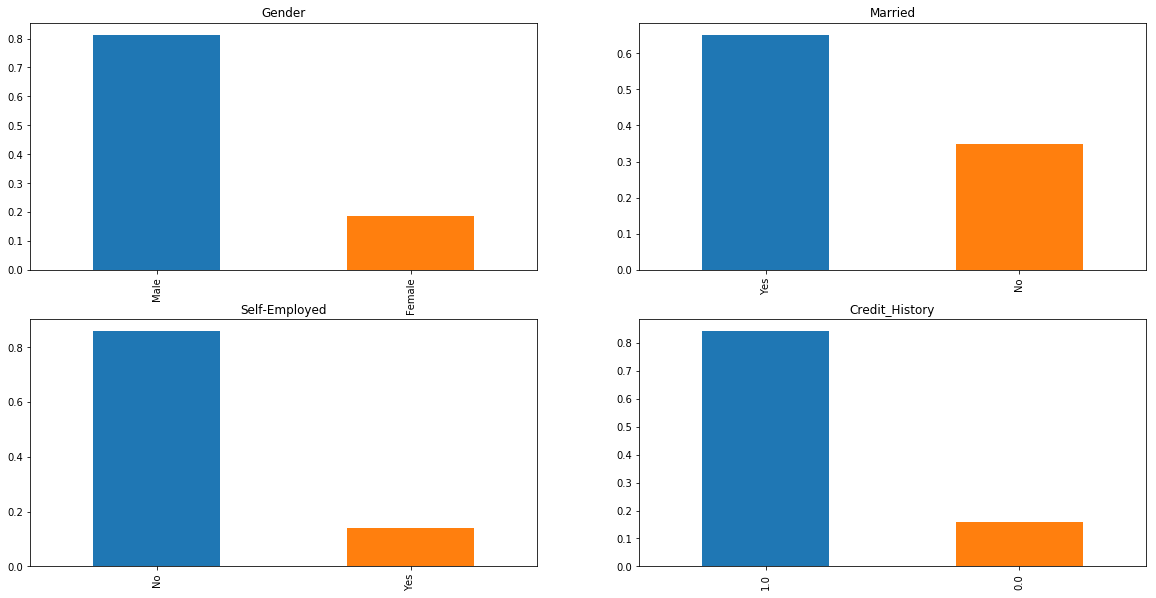

In [9]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self-Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

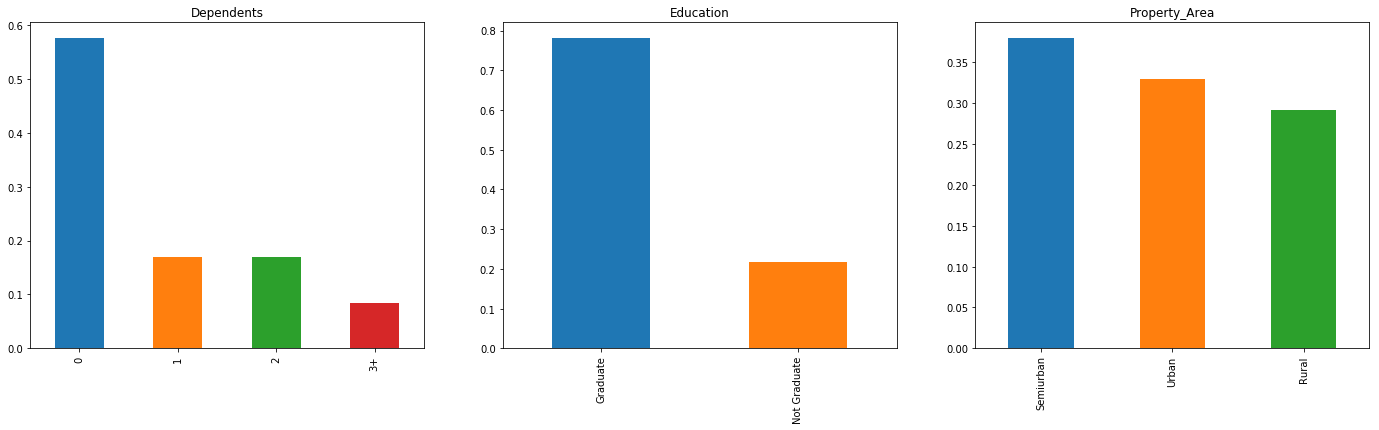

In [10]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

<h3>From the above univariate analyis we can say that the data is not unifomly distributed among various classes,
skewness is present and we have delt with them accordingly</h3>

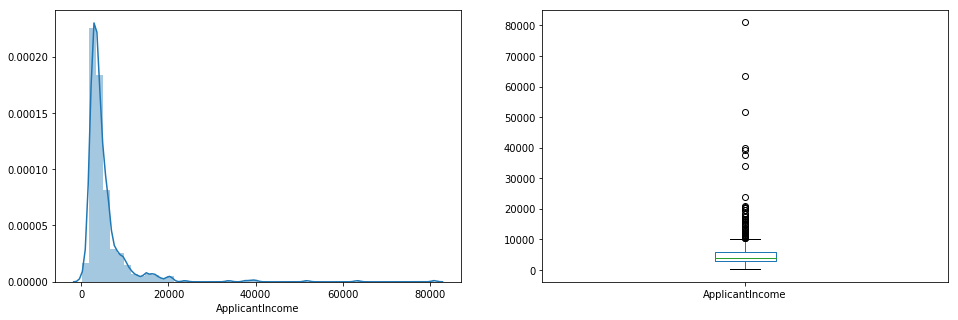

In [11]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

<h4>analysis shows large number of outliers present but this could not be true as different classes of people are present here and among their class they might not be an outlier
</h4>

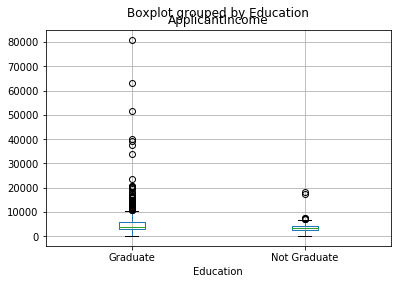

In [12]:
train.boxplot(column='ApplicantIncome', by='Education')

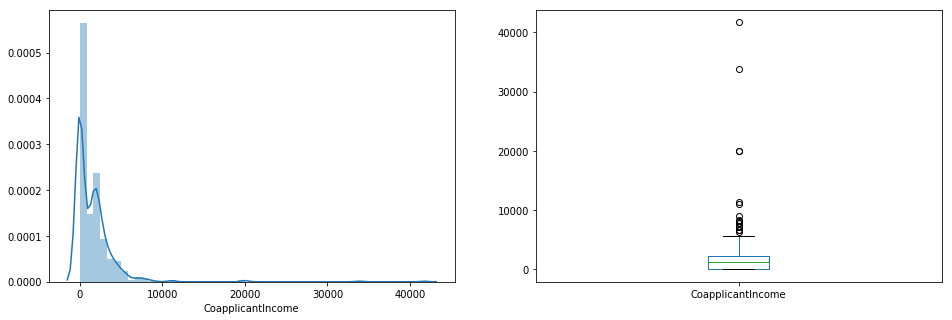

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [15]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<h4> Above analyis show most of the co applicant has zero income, it seems that for the loan application the applicant has no co applicant with him/her</h4>

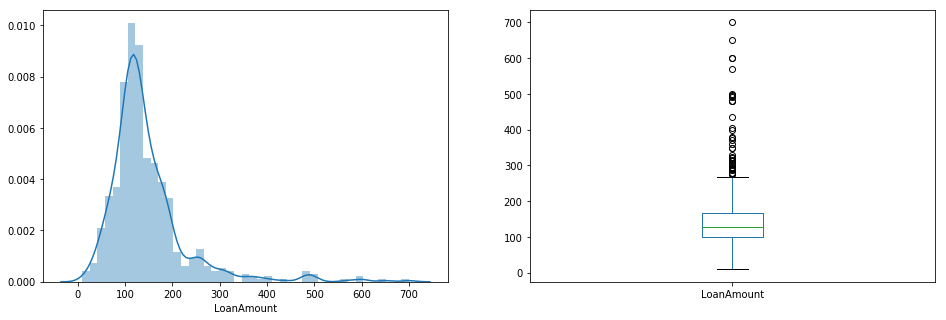

In [16]:
# plt.figure(1)
# plt.subplot(121)
# df=train.dropna()
# sns.distplot(df['LoanAmount']);

# plt.subplot(122)
# train['LoanAmount'].plot.box(figsize=(16,5))

# plt.show()

plt.figure(1)
plt.subplot(121)
a =train.LoanAmount.dropna()
sns.distplot(a);
plt.subplot(122)
a.plot.box(figsize=(16,5))
plt.show()



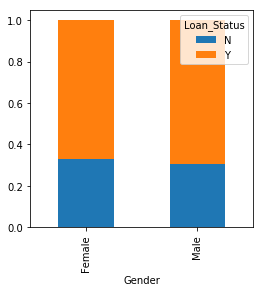

In [17]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(4,4))

<h4>From the plot it can be seen that Loan approval is not gender biased, hence we will remove this feature when we will create our model</h4>

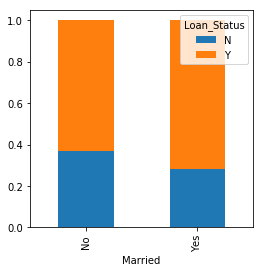

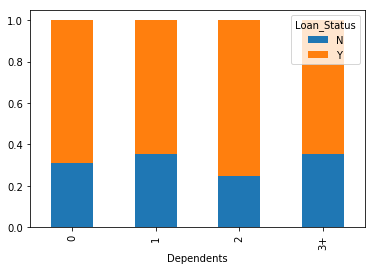

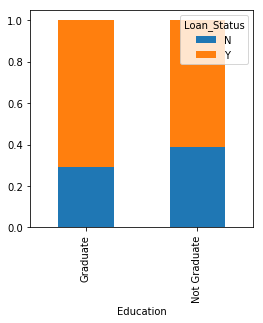

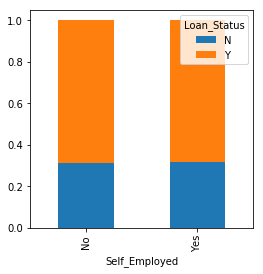

In [18]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

<h4> From the above plot we can see self_employment doesn't have any significant effect on loan status </h4>

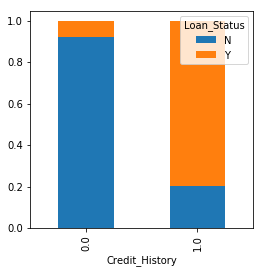

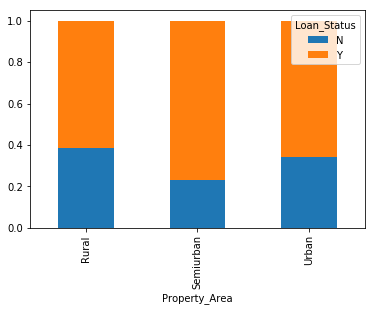

In [19]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

<h4> Credit history plays a huge role in approval of lones</h4>

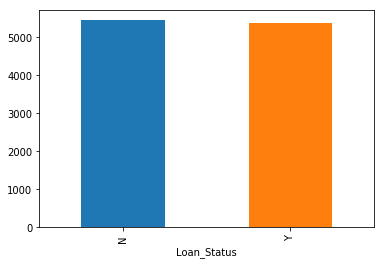

In [20]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

<b>It can be seen that average income of the people who got loan is eq to the avg income of the ones who doesn't</b>

In [21]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

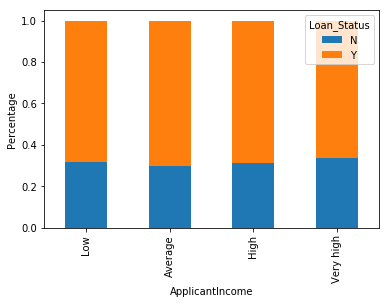

In [22]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

<b>It can be seen the applicant income alone doesn't play a significant role in approval of loan</b>

In [23]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

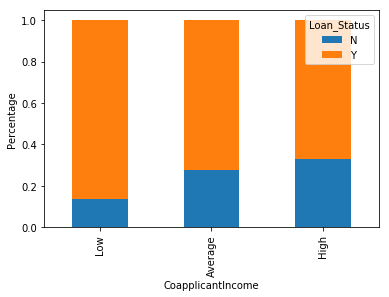

In [24]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')


<b>Graph is proposing that low coaapliant income has higher chance of loan appraoval which is no right reason may be most applicant doesn't have coo applicant</b>

In [25]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

In [26]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

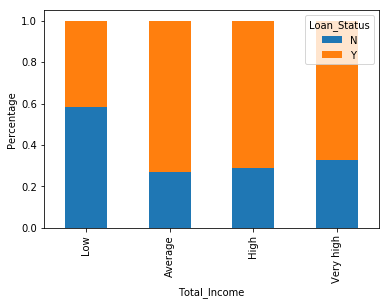

In [27]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

<b>Now it can be seen that the newly created feature has some effect on approval of loan</b>

In [28]:
bins=[0,100,200,700]
group=['Low','Avgerage','High']
train['Loan_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)

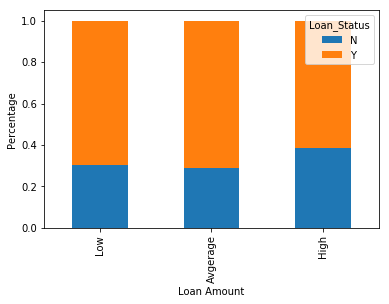

In [29]:
Loan_bin = pd.crosstab(train['Loan_bin'],train['Loan_Status'])
Loan_bin.div(Loan_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Loan Amount')
p=plt.ylabel('Percentage')

In [30]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'Loan_bin', 'Total_Income_bin','ApplicantIncome','CoapplicantIncome'],
                 axis=1)
test = test.drop(['ApplicantIncome','CoapplicantIncome'],
                 axis=1)

In [31]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)

train['Dependents'] = pd.to_numeric(train['Dependents'])
test['Dependents'] = pd.to_numeric(test['Dependents'])

train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

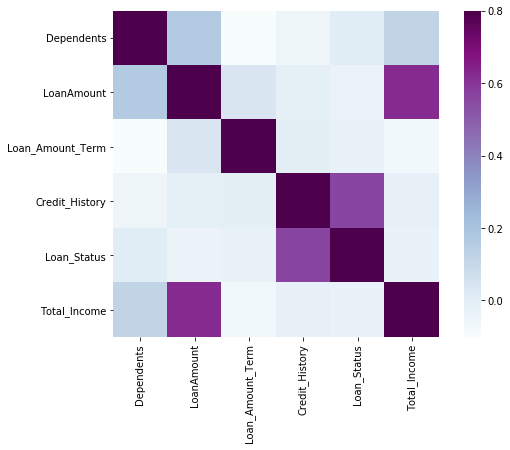

In [32]:
matrix=train.corr()
plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

Correlation matrix 

In [33]:
train.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [34]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [35]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
train.describe()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
count,614.000000,592.000000,600.00000,614.000000,614.000000,614.000000
mean,0.744300,146.412162,342.00000,0.855049,0.687296,7024.705081
std,1.009623,85.587325,65.12041,0.352339,0.463973,6458.663872
min,0.000000,9.000000,12.00000,0.000000,0.000000,1442.000000
25%,0.000000,100.000000,360.00000,1.000000,0.000000,4166.000000
50%,0.000000,128.000000,360.00000,1.000000,1.000000,5416.500000
75%,1.000000,168.000000,360.00000,1.000000,1.000000,7521.750000
max,3.000000,700.000000,480.00000,1.000000,1.000000,81000.000000


<b>From the summary of data, we can see that it would be a good approximation for to fill the Loan_Amount_Term with mode of data</b> 

In [37]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [38]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [39]:
train.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income        0
dtype: int64

In [40]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [41]:
full_data = [test,train]

for dataset in full_data:
    dataset['EMI'] = dataset['LoanAmount']/dataset['Loan_Amount_Term']


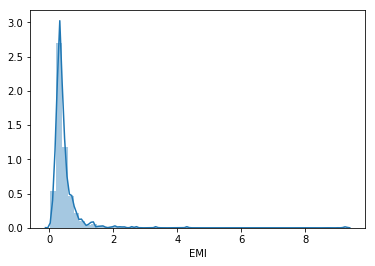

In [42]:
sns.distplot(train['EMI'])
plt.show();

<b>Data is skewed so we will take log transform so as to remove the skewness</b>

In [45]:
train['Balance Income']=train['Total_Income']-(train['EMI'])
test['Balance Income']=test['Total_Income']-(test['EMI'])

In [46]:
train.describe()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,EMI,Balance Income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,145.752443,342.410423,0.855049,0.687296,7024.705081,0.473687,7024.231394
std,1.009623,84.107233,64.428629,0.352339,0.463973,6458.663872,0.511134,6458.477336
min,0.000000,9.000000,12.000000,0.000000,0.000000,1442.000000,0.025000,1441.902778
25%,0.000000,100.250000,360.000000,1.000000,0.000000,4166.000000,0.288889,4165.765278
50%,0.000000,128.000000,360.000000,1.000000,1.000000,5416.500000,0.361111,5416.113889
75%,1.000000,164.750000,360.000000,1.000000,1.000000,7521.750000,0.505556,7519.018750
max,3.000000,700.000000,480.000000,1.000000,1.000000,81000.000000,9.250000,80999.000000


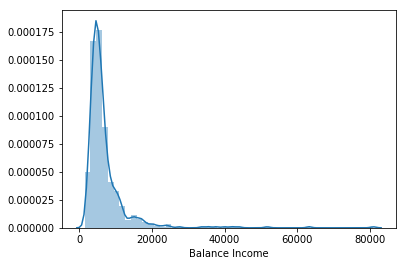

In [47]:
sns.distplot(train['Balance Income'])
plt.show();

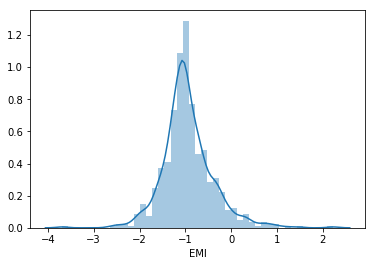

In [48]:
for dataset in full_data:
    dataset['EMI'] = np.log(dataset['EMI'])
    dataset['Balance Income'] = np.log(dataset['Balance Income'])
    
sns.distplot(train['EMI'])
plt.show();

In [49]:
train.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income        0
EMI                 0
Balance Income      0
dtype: int64

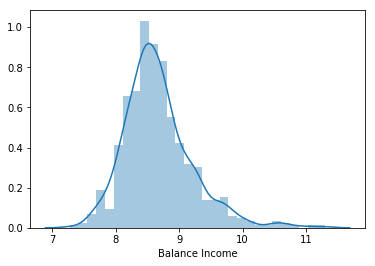

In [50]:
sns.distplot(train['Balance Income'])
plt.show();

In [51]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI,Balance Income
0,LP001015,Male,Yes,0.0,Graduate,No,110.0,360.0,1.0,Urban,5720,-1.185624,8.651671
1,LP001022,Male,Yes,1.0,Graduate,No,126.0,360.0,1.0,Urban,4576,-1.049822,8.428504
2,LP001031,Male,Yes,2.0,Graduate,No,208.0,360.0,1.0,Urban,6800,-0.548566,8.824593
3,LP001035,Male,Yes,2.0,Graduate,No,100.0,360.0,1.0,Urban,4886,-1.280934,8.494072
4,LP001051,Male,No,0.0,Not Graduate,No,78.0,360.0,1.0,Urban,3276,-1.529395,8.094312


In [52]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Balance Income
0,LP001002,Male,No,0.0,Graduate,No,128.0,360.0,1.0,Urban,1,5849.0,-1.034074,8.673965
1,LP001003,Male,Yes,1.0,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0,-1.034074,8.714509
2,LP001005,Male,Yes,0.0,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0,-1.696449,8.006306
3,LP001006,Male,Yes,0.0,Not Graduate,No,120.0,360.0,1.0,Urban,1,4941.0,-1.098612,8.505256
4,LP001008,Male,No,0.0,Graduate,No,141.0,360.0,1.0,Urban,1,6000.0,-0.937344,8.699449


<b>Loan Amount has outliers and is right skewed.
Taking log tansform so as to make the distribution as normal distribution</b>

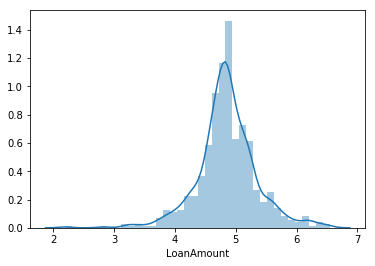

In [53]:
train['LoanAmount'] = np.log(train['LoanAmount'])
test['LoanAmount'] = np.log(test['LoanAmount'])

sns.distplot(train['LoanAmount'])
plt.show();
train_cpy = train.copy()
test_cpy = test.copy()

<h3> Dropping features which are very less siginificant</h3>

In [54]:
col = ['Loan_ID','Gender','Self_Employed']

train = train.drop(col,axis=1)
test  = test.drop(col,axis=1)

In [55]:
train['Dependents']= train['Dependents'].astype(int)
test['Dependents']= test['Dependents'].astype(int)

# train.Dependents.apply(str)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Married             614 non-null object
Dependents          614 non-null int32
Education           614 non-null object
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Credit_History      614 non-null float64
Property_Area       614 non-null object
Loan_Status         614 non-null int64
Total_Income        614 non-null float64
EMI                 614 non-null float64
Balance Income      614 non-null float64
dtypes: float64(6), int32(1), int64(1), object(3)
memory usage: 50.4+ KB


In [57]:
train['Credit_History']= train['Credit_History'].astype(int)
test['Credit_History'] = test['Credit_History'].astype(int)

col = ['Married','Education','Property_Area']
train = pd.get_dummies(train,drop_first = True,columns = col)
test  = pd.get_dummies(test,drop_first = True,columns = col)

In [58]:
train.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,EMI,Balance Income,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,0,4.852030,360.0,1,1,5849.0,-1.034074,8.673965,0,0,0,1
1,1,4.852030,360.0,1,0,6091.0,-1.034074,8.714509,1,0,0,0
2,0,4.189655,360.0,1,1,3000.0,-1.696449,8.006306,1,0,0,1
3,0,4.787492,360.0,1,1,4941.0,-1.098612,8.505256,1,1,0,1
4,0,4.948760,360.0,1,1,6000.0,-0.937344,8.699449,0,0,0,1


In [59]:
y=train['Loan_Status'].values

train = train.drop(['Loan_Status'],axis=1)

print(test.info(),'\n','Test\n')
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Dependents                 367 non-null int32
LoanAmount                 367 non-null float64
Loan_Amount_Term           367 non-null float64
Credit_History             367 non-null int32
Total_Income               367 non-null int64
EMI                        367 non-null float64
Balance Income             367 non-null float64
Married_Yes                367 non-null uint8
Education_Not Graduate     367 non-null uint8
Property_Area_Semiurban    367 non-null uint8
Property_Area_Urban        367 non-null uint8
dtypes: float64(4), int32(2), int64(1), uint8(4)
memory usage: 18.7 KB
None 
 Test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Dependents                 614 non-null int32
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null int32
Tota

In [60]:
X = train.values
X_test = test.values

In [61]:
from sklearn.model_selection import train_test_split

X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.2)

<h1>Creation of model</h1>

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [63]:
lrc = LogisticRegression(C=1.0,n_jobs=-1,max_iter=1000,random_state=0,solver='liblinear')
lrc.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=-1, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
print(lrc.score(X_train,y_train),'\nTrain_Score\n')
print(lrc.score(X_cv,y_cv),'\nTrain_Score\n')

0.8105906313645621 
Train_Score

0.7967479674796748 
Train_Score



In [65]:
y_pred = lrc.predict(X_cv)

In [66]:
accuracy_score(y_cv,y_pred)

0.7967479674796748

In [ ]:
# pred_test = lrc.predict(test)

In [ ]:
# submission = pd.read_csv('Sample_Submission.csv')

In [ ]:
# submission['Loan_Status'] = pred_test
# submission['Loan_ID'] = test_ori['Loan_ID']

In [ ]:
# submission.Loan_Status.replace(0,'N',inplace=True)
# submission.Loan_Status.replace(1,'Y',inplace=True)

In [ ]:
# pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('log.csv',index=False)

In [ ]:
# from sklearn.model_selection import StratifiedKFold

In [ ]:
# i=1
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X,y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     Xtr,Xtst = X.loc[train_index],X.loc[test_index]
#     ytr,ytst = y[train_index],y[test_index]
    
#     lrc = LogisticRegression(random_state=1)
#     lrc.fit(Xtr,ytr)
#     y_pred= lrc.predict(Xtst)
#     score = accuracy_score(ytst,y_pred)
#     print('accuracy score',score)
#     i=i+1
# pred_test = lrc.predict(test)
# pred=lrc.predict_proba(Xtst)[:,1]

In [ ]:
# from sklearn import metrics
# fpr,tpr,_ = metrics.roc_curve(ytst,pred)
# auc = metrics.roc_auc_score(ytst,pred)
# plt.figure(figsize=(12,8))
# plt.plot(fpr,tpr,label="validation, auc="+str(auc))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc=4)
# plt.show()

In [ ]:
# train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
# test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

In [67]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=0,oob_score=True,
                             min_samples_leaf=10,min_samples_split=10)

In [68]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [69]:
print(rfc.score(X_train,y_train),'\nTrain_Score\n')
print(rfc.score(X_cv,y_cv),'\nTrain_Score\n')

0.814663951120163 
Train_Score

0.7967479674796748 
Train_Score



In [70]:
from sklearn.ensemble import AdaBoostClassifier

abc =  AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators=100,n_jobs=-1,
                                                                  random_state=0,oob_score=True,
                                                                  min_samples_leaf=10,min_samples_split=10),
                          n_estimators=50,random_state=0)

abc = AdaBoostClassifier(base_estimator = LogisticRegression(C=1.0,n_jobs=-1,max_iter=1000,
                                                             random_state=0,solver='liblinear'),
                                                             n_estimators=50,random_state=0)

In [71]:
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=-1, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=0)

In [72]:
print(abc.score(X_train,y_train),'\nTrain_Score\n')
print(abc.score(X_cv,y_cv),'\nTrain_Score\n')

0.8085539714867617 
Train_Score

0.7886178861788617 
Train_Score



In [ ]:
pred_test = lrc.predict(test)

In [ ]:
submission = pd.read_csv('Sample_Submission.csv')

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_cpy['Loan_ID']

submission.Loan_Status.replace(0,'N',inplace=True)
submission.Loan_Status.replace(1,'Y',inplace=True)

pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('preds.csv',index=False)